In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df=pd.read_csv('F:/T1.csv',encoding='ANSI')

In [3]:
mean=np.mean(df['LV ActivePower'])
df=df.replace(to_replace=0 ,value=mean)

In [4]:
ws=df[['LV ActivePower','Date/Time']]

In [5]:
ws

,LV ActivePower,Date/Time
0,380.047790,01 01 2018 00:00
1,453.769196,01 01 2018 00:10
2,306.376587,01 01 2018 00:20
3,419.645904,01 01 2018 00:30
4,380.650696,01 01 2018 00:40
5,402.391998,01 01 2018 00:50
6,447.605713,01 01 2018 01:00
7,387.242188,01 01 2018 01:10
8,463.651215,01 01 2018 01:20
9,439.725708,01 01 2018 01:30


In [6]:
ws['Date/Time'].min()

'01 01 2018 00:00'

In [7]:
ws['Date/Time'].max()

'31 12 2018 23:50'

In [8]:
per=pd.DatetimeIndex(df['Date/Time']).to_period("M")
#y=ws.groupby(ws.'Date/Time'.dt.year)
#y=ws['LV ActivePower'].groupby().mean()
per

PeriodIndex(['2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01',
             '2018-01', '2018-01', '2018-01', '2018-01',
             ...
             '2018-12', '2018-12', '2018-12', '2018-12', '2018-12', '2018-12',
             '2018-12', '2018-12', '2018-12', '2018-12'],
            dtype='period[M]', name='Date/Time', length=50530, freq='M')

In [9]:
g=df.groupby(per)
g

In [10]:
g.mean()

,LV ActivePower,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01,1857.420303,9.761753,2159.728116,139.846490
2018-02,1722.210779,8.179499,1856.822615,127.354313
2018-03,1943.687568,9.204149,2021.291495,160.063426
2018-04,1390.397282,7.976378,1440.071189,99.802337
2018-05,1403.849978,6.987072,1506.688422,105.351242
2018-06,1468.313757,7.455669,1601.693234,136.997745
2018-07,1091.951894,5.474675,1131.998218,148.971935
2018-08,1602.366290,8.050320,1770.090495,89.431593
2018-09,1688.024945,8.031185,1761.721612,108.475984


In [11]:
x=g[['LV ActivePower','Wind Speed (m/s)']].mean()
y=g[['LV ActivePower']].mean()
y

,LV ActivePower
Date/Time,
2018-01,1857.420303
2018-02,1722.210779
2018-03,1943.687568
2018-04,1390.397282
2018-05,1403.849978
2018-06,1468.313757
2018-07,1091.951894
2018-08,1602.366290
2018-09,1688.024945


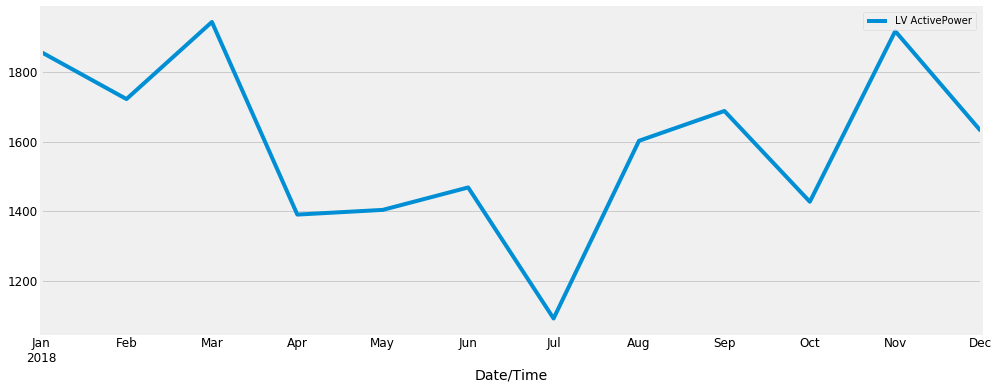

In [12]:
y.plot(figsize=(15,6))
plt.show()

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

TypeError: PeriodIndex given. Check the `freq` attribute instead of using infer_freq.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
y.interpolate(inplace = True)
y.index=y.index.to_timestamp()
decomposition = seasonal_decompose(y)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:195.38039066281092
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:167.9583798191684
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:146.98453062465057
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000


IndexError: index 0 is out of bounds for axis 0 with size 0

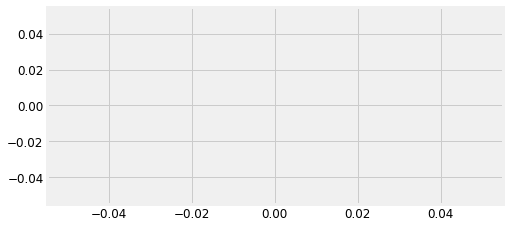

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

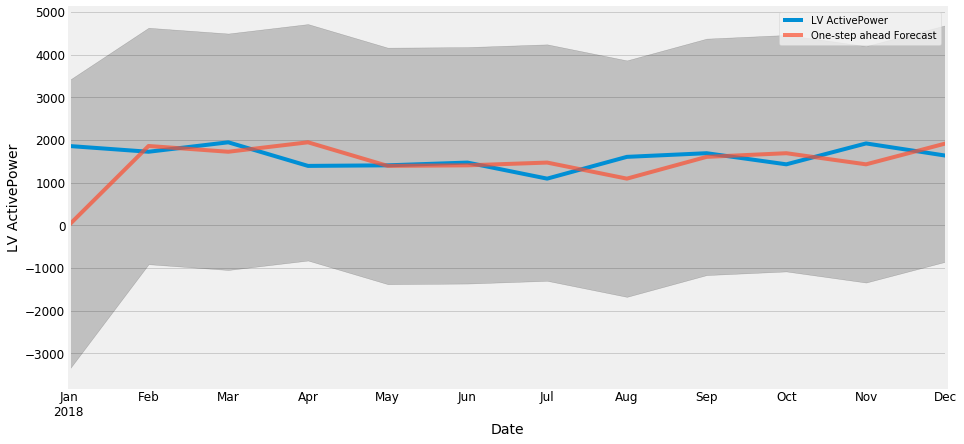

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('LV ActivePower')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2018':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
LV ActivePower        NaN
dtype: float64


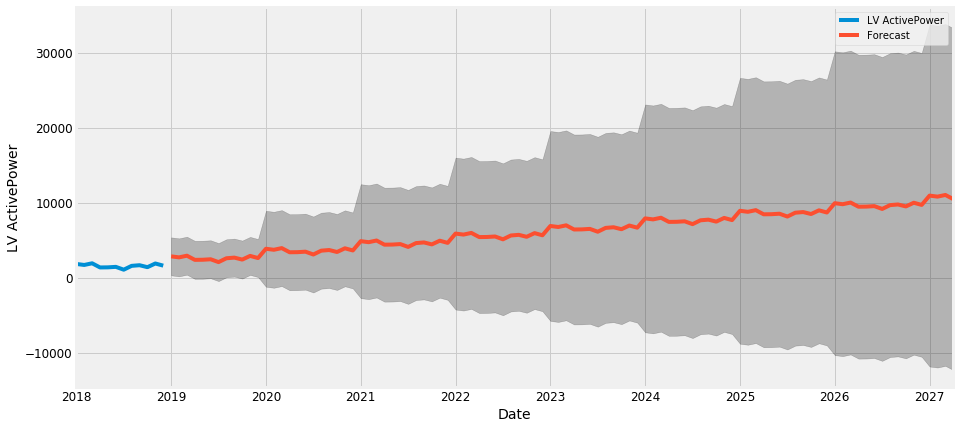

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('LV ActivePower')
plt.legend()
plt.show()

In [22]:
#LV ActivePower vs Wind Speed

x

,LV ActivePower,Wind Speed (m/s)
Date/Time,,
2018-01,1857.420303,9.761753
2018-02,1722.210779,8.179499
2018-03,1943.687568,9.204149
2018-04,1390.397282,7.976378
2018-05,1403.849978,6.987072
2018-06,1468.313757,7.455669
2018-07,1091.951894,5.474675
2018-08,1602.366290,8.050320
2018-09,1688.024945,8.031185


In [ ]:
pip install fbprophet